# End-to-End Machine Learning with the Iris Dataset

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import model_selection, metrics

# import models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.datasets import load_iris
#!%matplotlib ipympl
print("Setup complete")
##############################################################

Setup complete


## Load iris dataset

In [2]:
iris = load_iris()
dline = "="*35
line = "-"*35

# map target names to target and clasify the different iris species
target_names = iris.target_names[iris.target]
features = iris.feature_names


# Prepare dataframe
df_iris = pd.DataFrame(data = iris.data, columns=features)
df_iris["species"] = target_names

print("Check general dataset information")
print(line)
print(df_iris.describe())


print(dline, dline)
print("\n\nCheck species distribution")
print(line)
print(df_iris.groupby("species").size())


##############################################################

Check general dataset information
-----------------------------------
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
=================================== ===================================


Check species distribution
---------

## Data Visualisation

### Univariate plots

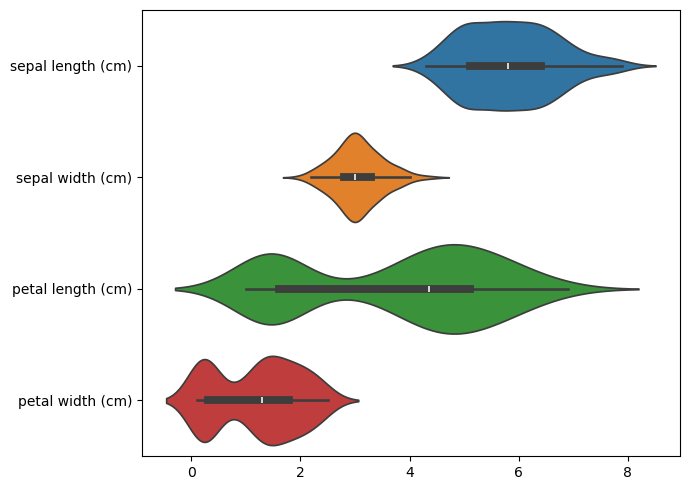

In [3]:
# Plot the different attributes of the dataset to check distributions
fig1 = plt.figure(figsize=(7,5))

sns.violinplot(
    data = df_iris,
    orient="h"
)

plt.tight_layout()
plt.show()

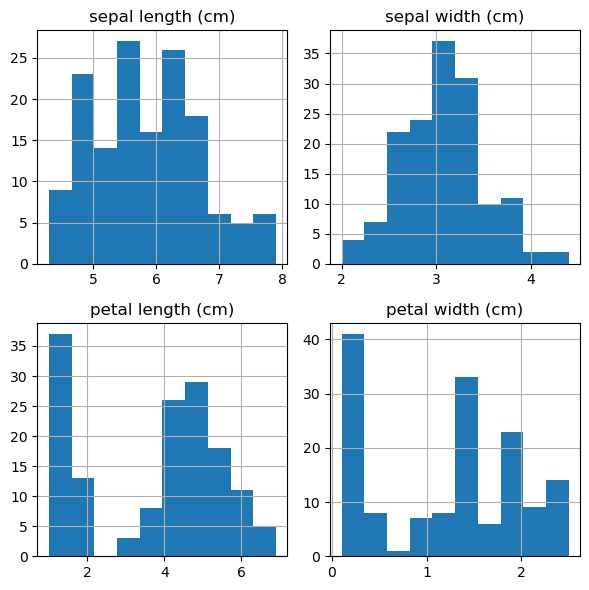


      It looks like perhaps two of the input variables have a Gaussian
      distribution. This is useful to note as we can use algorithms
      that can exploit this assumption.
      


In [4]:
# Plot histograms for the different attributes
df_iris.hist(figsize=(6,6))

plt.tight_layout()
plt.show()


# FROM SOURCE
print("""
      It looks like perhaps two of the input variables have a Gaussian
      distribution. This is useful to note as we can use algorithms
      that can exploit this assumption.
      """
)

It looks like the features of all species display a Gausian distribution.


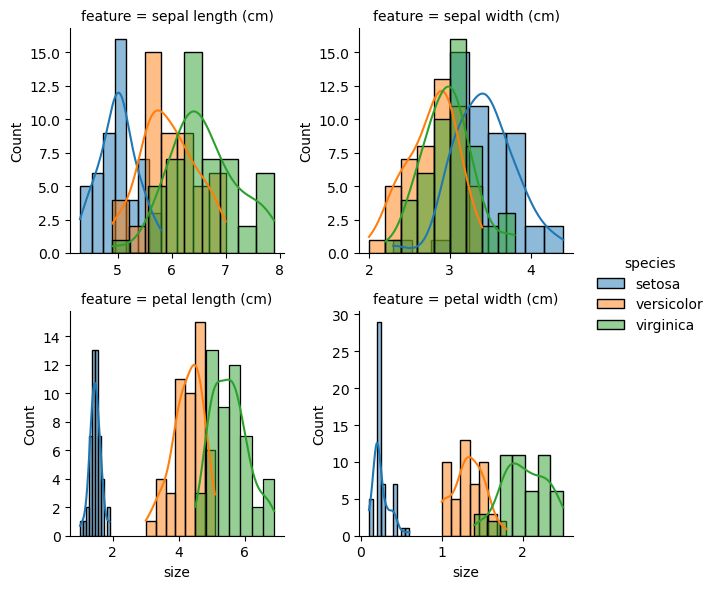

In [5]:
# Same idea but plot using Seaborn and separate the species in each subplot
# First translate the dataframe to long format
df_long = df_iris.melt(id_vars="species", value_vars=features, var_name="feature", value_name="size")

# Check the distributions of each different species
g = sns.FacetGrid(df_long, col="feature", col_wrap=2, sharex=False, sharey=False, hue="species")
g.map(sns.histplot, "size", kde=True)

g.add_legend()
g.tight_layout()

print("It looks like the features of all species display a Gausian distribution.")

plt.show()

##############################################################

### Multivariate plots

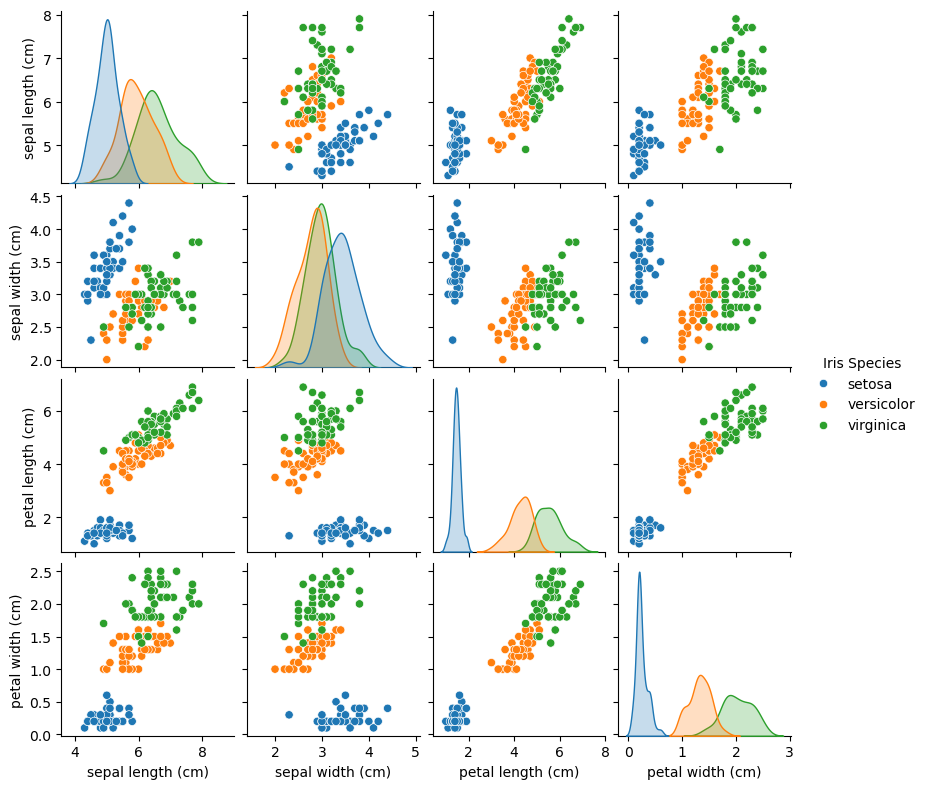

In [6]:
# Check interactions between the variables. Plot attribute pairs.
pp = sns.pairplot(df_iris, hue="species", diag_kind="kde", height=2)
# Could have used pd.plotting.scatter_matrix(df_iris)

pp._legend.set_title("Iris Species")

# pp.tight_layout()
# pp.savefig(fname=r"images\Multivariate_plot.png", dpi=450, format="png")

plt.show()

##############################################################

## Algorithm evaluation

In [7]:
# Split training and validation datasets
X = df_iris[features].values
y = df_iris["species"].values

train_X, val_X, train_y, val_y = model_selection.train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=1
)

# FROM SOURCE
# Use stratified 10-fold cross validation to estimate model accuracy.
# This will split our dataset into 10 parts, train on 9 and test on 1 and
# repeat for all combinations of train-test splits.

##############################################################
## Test 6 different algorithms
# Logistic Regression (LR)
# Linear Discriminant Analysis (LDA)
# K-Nearest Neighbors (KNN).
# Classification and Regression Trees (CART).
# Gaussian Naive Bayes (NB).
# Support Vector Machines (SVM).
##############################################################
# This is a good mixture of simple linear (LR and LDA),
# nonlinear (KNN, CART, NB and SVM) algorithms.
##############################################################

algorithms = {}
results = {}

algorithms['LR'] = LogisticRegression(solver='newton-cg')
algorithms['LDA'] = LinearDiscriminantAnalysis()
algorithms['KNN'] = KNeighborsClassifier()
algorithms['CART'] = DecisionTreeClassifier()
algorithms['NB'] = GaussianNB()
algorithms['SVM'] = SVC(gamma='auto')

algorithm_names = list(algorithms.keys())


print("Algorithm\t Average\t Standard Deviation")
print(line,line)


for name in algorithm_names:
    kfold = model_selection.StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_result = model_selection.cross_val_score(
        algorithms[name],
        train_X,
        train_y,
        cv=kfold,
        scoring="accuracy"
    )
    results[name] = cv_result
    print(f"  {name}\t\t   {cv_result.mean():.3f}\t   \u00B1 {cv_result.std():.3f}")


df_results = pd.DataFrame(results)

##############################################################

Algorithm	 Average	 Standard Deviation
----------------------------------- -----------------------------------
  LR		   0.967	   ± 0.041
  LDA		   0.975	   ± 0.038
  KNN		   0.958	   ± 0.042
  CART		   0.958	   ± 0.042
  NB		   0.950	   ± 0.055
  SVM		   0.983	   ± 0.033


## Algorithm Comparison

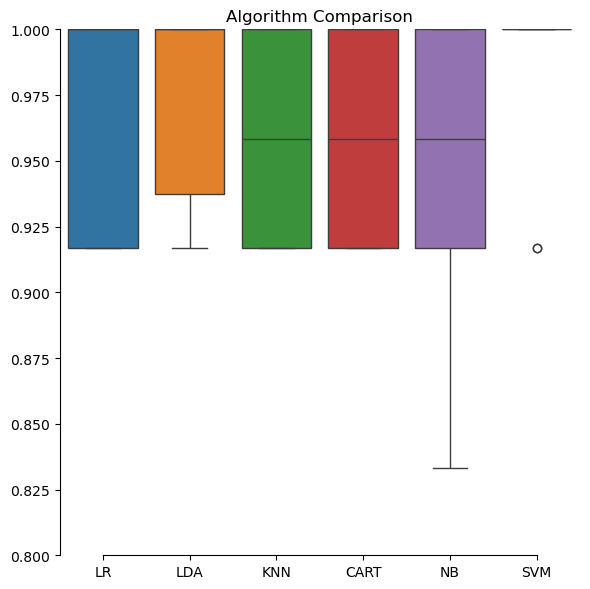

SVM seems to be the most accurate model.
=================================== ===================================


In [8]:
fig2 = plt.figure(figsize=(6,6))

sns.boxplot(data = df_results)

plt.title("Algorithm Comparison")
plt.ylim(bottom=0.8,top=1)
sns.despine(trim=True)

plt.tight_layout()

# fig2.savefig(fname=r"images\Algorithm_Comparison.png",dpi=300, format="png")
plt.show()

print("SVM seems to be the most accurate model.")
print(dline,dline)

##############################################################

## Results

In [9]:
# Going through all models

# chosen_model = "SVM"
for chosen_model in algorithm_names:
    print(f"Model: {chosen_model}")
    print(line)
    model = algorithms[chosen_model]

    model.fit(train_X, train_y)
    predictions = model.predict(val_X)


    score = metrics.accuracy_score(val_y, predictions)
    conf_matrix = metrics.confusion_matrix(val_y, predictions)
    c_report = metrics.classification_report(val_y, predictions)

    print(f"Accuracry score: {score:.3f}\n")
    # print(line)
    print(f"Confusion matrix: \n{conf_matrix}\n")
    # print(line)
    print(f"Classification report: \n{c_report}")

    # print(dline,dline)
    print(dline,dline,"\n")

# COMMENT FROM SOURCE
print("It should be noted that the validation dataset is small.")

##############################################################

Model: LR
-----------------------------------
Accuracry score: 0.967

Confusion matrix: 
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

Classification report: 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

=================================== =================================== 

Model: LDA
-----------------------------------
Accuracry score: 1.000

Confusion matrix: 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Classification report: 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy            

## Conclusion

Across multiple algorithms, Support Vector Machines (SVM) achieved the highest
average accuracy on the Iris dataset, confirming its strength for small,
well-structured datasets. However, all models performed reasonably well,
reflecting the separability of the classes in this dataset.

Next steps could include hyperparameter tuning, testing on other datasets,
and exploring ensemble methods such as Random Forests or Gradient Boosting.